# 1.この課題の目的
## セグメンテーションを行う
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.セグメンテーション
医療データに対するセグメンテーションを行います。KaggleのTGS Salt Identification Challengeのデータセットを使用します。

[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)

セグメンテーション手法としてU-Net[1]を使います。

[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

[https://arxiv.org/pdf/1505.04597.pdf](https://arxiv.org/pdf/1505.04597.pdf)

# 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。

[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)

## GPU環境での学習

大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。

## 新たなデータセットの適用

Sprint18,19と同様に実装で用意されたものとは異なるデータセットを入力します。

## 実行環境
- Google ColaboratoryのGPUを使用
- Google Driveに使用データを格納

## ①[Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)のページから使用するデータをGoogle Driveへ格納する

### Google DriveをGoogle Colabにマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Kaggle.jsonのアップロード

In [0]:
# from google.colab import files
# files.upload()

### Kaggle.jsonのパスを指定

In [0]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

###  アクセスパーミッションの設定変更

In [0]:
# !chmod 600 /root/.kaggle/kaggle.json

### Kaggleのページからデータを取得する

In [0]:
# !kaggle competitions download -c tgs-salt-identification-challenge

### trainデータを取得

In [0]:
# !unzip train.zip -d '/content/drive/My Drive/Colab Notebooks/sprint20/unet-master/data/salt/train'

### testデータを取得

In [0]:
# !unzip test.zip -d '/content/drive/My Drive/Colab Notebooks/sprint20/unet-master/data/salt/test'

## ②学習

### U-Netモデルの格納フォルダへカレントフォルダを変更

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/sprint20/unet-master')

### 使用するファイルをインポート

In [0]:
from model import *
from data import *

Using TensorFlow backend.


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

### 学習
#### 予測をより高精度に行えるようにする為、以下の箇所をデフォルト値から変更
- trainGenerator()のパラメータbatchsizeを2→8

In [0]:
import os
os.getcwd()
checkpoint_file = 'unet_salt_0615_test.hdf5'

In [0]:
import time

checkpoint_file = 'unet_salt_0615_test.hdf5'

t0 = time.time()
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

myGene = trainGenerator(batch_size=2, train_path='./data/salt/train',image_folder='images',mask_folder='masks',\
                        aug_dict=data_gen_args,save_to_dir = None)

model = unet()

model_checkpoint = ModelCheckpoint(checkpoint_file , monitor='loss',verbose=1, save_best_only=True)

model.fit_generator(myGene,steps_per_epoch=2000,epochs=15,callbacks=[model_checkpoint])

t1 = time.time()
print('time : {}s'.format(t1-t0))

/content/drive/My Drive/Colab Notebooks/sprint20/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/15
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
2000/2000 [==============================] - 2165s 1s/step - loss: 0.5529 - acc: 0.7523

Epoch 00001: loss improved from inf to 0.55290, saving model to unet_salt_0615_test.hdf5
Epoch 2/15
2000/2000 [==============================] - 367s 183ms/step - loss: 0.4325 - acc: 0.8140

Epoch 00002: loss improved from 0.55290 to 0.43247, saving model to unet_salt_0615_test.hdf5
Epoch 3/15
2000/2000 [==============================] - 365s 182ms/step - loss: 0.3382 - acc: 0.8746

Epoch 00003: loss improved from 0.43247 to 0.33820, saving model to unet_salt_0615_test.hdf5
Epoch 4/15
2000/2000 [==============================] - 362s 181ms/step - loss: 0.3001 - acc: 0.8915

Epoch 00004: loss improved from 0.33820 to 0.30006, saving model to unet_salt_0615_test.hdf5
Epoch 5/15
2000/2000 [==============================] - 360s 180ms/step - loss: 0.2837 - acc: 0.8957

Epoch 00005: loss improved from 0.30006 

### testデータのファイル名の修正
- 今回使用した予測モデルはtsetデータのファイル名が0.png、1.png~となっていなければ動作しないプログラムとなっているが、使用するtestデータのファイル名はそのようなファイル名となっていない為、以下のプログラムでファイル名を修正する

In [0]:
# import os
# os.chdir('/content/drive/My Drive/Colab Notebooks/sprint20/unet-master/data/salt/test/images')

# # 連番リネーム
# import glob, os # --- (*1)
# # ファイル列挙 --- (*2)
# files = glob.glob("*.png")
# # 繰り返しリネーム --- (*3)
# i = 0
# for old_name in files:
#     # 数値を三桁(001)形式にそろえる --- (*4)
#     zero_i = "{}".format(i)
#     # ファイル名を作る
#     new_name = zero_i + ".png"
#     # 改名する --- (*5)
#     os.rename(old_name, new_name)
#     # 状況を報告
#     print(old_name + "→" + new_name)
#     # 連番のため数値を加算 --- (*6)
#     i += 1

## ③予測

In [0]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/sprint20/unet-master'

In [0]:
testGene = testGenerator("./data/salt/test/images")
model = unet()
model.load_weights(checkpoint_file)
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/salt/predict",results)

/content/drive/My Drive/Colab Notebooks/sprint20/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


30/30 [==============================] - 11s 361ms/step


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/salt/predict/0_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0619 02:25:34.579811 140357405988736 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/salt/predict/1_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0619 02:25:34.827104 140357405988736 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/salt/predict/2_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0619 02:25:35.074433 140357405988736 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior t

In [4]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/sprint20/unet-master'

In [0]:
os.chdir('./data/salt/predict')

## 予測結果が指定フォルダに格納されているか確認

In [11]:
!ls

0_predict.png	17_predict.png	24_predict.png	4_predict.png
10_predict.png	18_predict.png	25_predict.png	5_predict.png
11_predict.png	19_predict.png	26_predict.png	6_predict.png
12_predict.png	1_predict.png	27_predict.png	7_predict.png
13_predict.png	20_predict.png	28_predict.png	8_predict.png
14_predict.png	21_predict.png	29_predict.png	9_predict.png
15_predict.png	22_predict.png	2_predict.png	image_gallery.py
16_predict.png	23_predict.png	3_predict.png


## 予測結果の表示(3枚のみ)

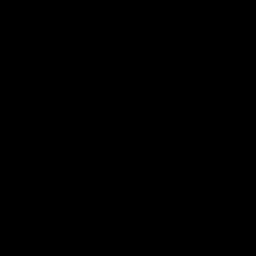

In [7]:
from PIL import Image
%matplotlib inline

    
Image.open('0_predict.png')

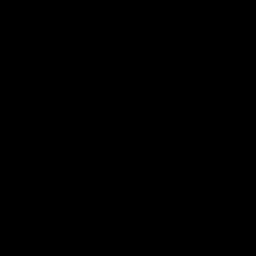

In [8]:
Image.open('1_predict.png')

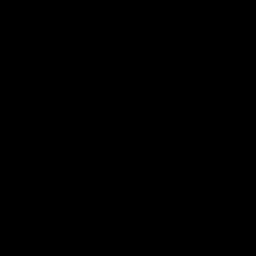

In [10]:
Image.open('2_predict.png')

## 予測結果の考察
### 予測結果の画像がどれも黒一色である考えられる理由は？
- 学習量が少ない為、性格な特徴量を抽出できていない

### 学習量を増やす為にはどうすれば良い？
- epoch数とiteration回数を増加して学習する事、が考えられるが、今回の学習時の処理より、大きな処理を必要とする為、現状の環境(Google CoabortoryのGPU)より高い処理能力のGPUを使用し、より時間をかけて学習させる必要がある。
- 畳み込み層をより深くする方法も考えられるが、この場合も上記と同様により多くの処理能力と時間が必要となる。

In [0]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/sprint20/unet-master'

In [0]:
os.chdir('./data/salt/predict')

In [0]:
!ls

0_predict.png	17_predict.png	24_predict.png	4_predict.png
10_predict.png	18_predict.png	25_predict.png	5_predict.png
11_predict.png	19_predict.png	26_predict.png	6_predict.png
12_predict.png	1_predict.png	27_predict.png	7_predict.png
13_predict.png	20_predict.png	28_predict.png	8_predict.png
14_predict.png	21_predict.png	29_predict.png	9_predict.png
15_predict.png	22_predict.png	2_predict.png	image_gallery.py
16_predict.png	23_predict.png	3_predict.png


# 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

## main.py
### 概要
- 学習モデル(U-Net)の定義、学習(DataAugumentationを実施)、予測を行うコードを記載

### 詳細
#### data_gen_args : 辞書
- 学習時にdata_augumentainを行う際の、画像の処理方法を記載

#### myGene : メソッド
- 学習時に使用するtrainGeneratorメソッドを格納した変数

#### model : インスタンス
- 学習モデルであるunetクラスのインスタンス

#### model_checkpoint : インスタンス
- 学習後の重みとバイアスを保存する為のModelCheckpointクラスのインスタンス

#### fit_generator
- 学習を実行するメソッド

#### testGene : メソッド
- 予測時に使用するtestGeneratorメソッドを格納した変数

#### results : インスタンス
- 予測結果を格納した変数

#### sabeResult : メソッド
- 予測結果を保存する

In [ ]:
# from model import *
# from data import *

# #os.environ["CUDA_VISIBLE_DEVICES"] = "0"


# data_gen_args = dict(rotation_range=0.2,
#                     width_shift_range=0.05,
#                     height_shift_range=0.05,
#                     shear_range=0.05,
#                     zoom_range=0.05,
#                     horizontal_flip=True,
#                     fill_mode='nearest')
# myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

# model = unet()
# model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
# model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

# testGene = testGenerator("data/membrane/test")
# results = model.predict_generator(testGene,30,verbose=1)
# saveResult("data/membrane/test",results)

## model.py
### 概要
- U-Net型の学習モデルを定義

In [ ]:
# Skip to content
 
# Search or jump to…

# Pull requests
# Issues
# Marketplace
# Explore
 
# @Takahiro-Nittamachi 
# Code  Issues 101  Pull requests 6  Projects 0  Wiki  Security  Pulse  Community
# unet/model.py
# @zhixuhao zhixuhao Update model.py
# d171fd0 on 27 Nov 2018
# 67 lines (52 sloc)  3.66 KB
    
# import numpy as np 
# import os
# import skimage.io as io
# import skimage.transform as trans
# import numpy as np
# from keras.models import *
# from keras.layers import *
# from keras.optimizers import *
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler
# from keras import backend as keras


# def unet(pretrained_weights = None,input_size = (256,256,1)):
#     inputs = Input(input_size)
#     conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
#     conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
#     pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
#     conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
#     pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
#     conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
#     pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
#     conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
#     conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
#     drop4 = Dropout(0.5)(conv4)
#     pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

#     conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
#     conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
#     drop5 = Dropout(0.5)(conv5)

#     up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
#     merge6 = concatenate([drop4,up6], axis = 3)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
#     conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

#     up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
#     merge7 = concatenate([conv3,up7], axis = 3)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
#     conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

#     up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
#     merge8 = concatenate([conv2,up8], axis = 3)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
#     conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

#     up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
#     merge9 = concatenate([conv1,up9], axis = 3)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
#     conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
#     conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
#     conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

#     model = Model(input = inputs, output = conv10)

#     model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
#     #model.summary()

#     if(pretrained_weights):
#     	model.load_weights(pretrained_weights)

#     return model


# © 2019 GitHub, Inc.
# Terms
# Privacy
# Security
# Status
# Help
# Contact GitHub
# Pricing
# API
# Training
# Blog
# About
